## Import & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Data Exploration

### Describe Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.describe(include=[object])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


### Missing Data

#### Train

In [8]:
"Total NaN in training set: " + str(len(train[train.isna().any(axis=1)])) + " rows"

'Total NaN in training set: 2087 rows'

In [9]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

#### Further Exploration on Missing Data

##### Rows w/ Missing Name

Find out whether missing names correlate to other columns missing value.

In [10]:
name_na = train[train.Name.isna()]
pd.concat([
    name_na.isna().sum().rename('NaN'),
    name_na.count().rename('Not NaN')
], axis=1)

,NaN,Not NaN
PassengerId,0,200
HomePlanet,7,193
CryoSleep,10,190
Cabin,2,198
Destination,4,196
Age,3,197
VIP,1,199
RoomService,1,199
FoodCourt,5,195
ShoppingMall,4,196


In [11]:
name_na.Transported.value_counts()

Transported
True     101
False     99
Name: count, dtype: int64

The ratio between transported and non-transported nameless passenger is almost 1:1. Most probably there's no significance for this specific data trait to determine the label.

##### Rows w/ Missing HomePlanet

In [12]:
home_na = train[train.HomePlanet.isna()]
pd.concat([
    home_na.isna().sum().rename('NaN'),
    home_na.count().rename('Not NaN')
], axis=1)

,NaN,Not NaN
PassengerId,0,201
HomePlanet,201,0
CryoSleep,2,199
Cabin,6,195
Destination,4,197
Age,2,199
VIP,3,198
RoomService,6,195
FoodCourt,2,199
ShoppingMall,7,194


In [13]:
home_na.Transported.value_counts()

Transported
True     103
False     98
Name: count, dtype: int64

##### Rows w/ Missing CryoSleep

In [14]:
cryo_na = train[train.CryoSleep.isna()]
pd.concat([
    cryo_na.isna().sum().rename('NaN'),
    cryo_na.count().rename('Not NaN')
], axis=1)

,NaN,Not NaN
PassengerId,0,217
HomePlanet,2,215
CryoSleep,217,0
Cabin,7,210
Destination,4,213
Age,1,216
VIP,7,210
RoomService,2,215
FoodCourt,3,214
ShoppingMall,8,209


In [15]:
cryo_na.Transported.value_counts()

Transported
False    111
True     106
Name: count, dtype: int64

##### Row w/ Missing Cabin

In [16]:
cabin_na = train[train.Cabin.isna()]
pd.concat([
    cabin_na.isna().sum().rename('NaN'),
    cabin_na.count().rename('Not NaN')
], axis=1)

,NaN,Not NaN
PassengerId,0,199
HomePlanet,6,193
CryoSleep,7,192
Cabin,199,0
Destination,4,195
Age,4,195
VIP,6,193
RoomService,4,195
FoodCourt,5,194
ShoppingMall,2,197


In [17]:
cabin_na.Transported.value_counts()

Transported
True     100
False     99
Name: count, dtype: int64

##### Row w/ Missing Destination

In [18]:
dest_na = train[train.Cabin.isna()]
pd.concat([
    dest_na.isna().sum().rename('NaN'),
    dest_na.count().rename('Not NaN')
], axis=1)

,NaN,Not NaN
PassengerId,0,199
HomePlanet,6,193
CryoSleep,7,192
Cabin,199,0
Destination,4,195
Age,4,195
VIP,6,193
RoomService,4,195
FoodCourt,5,194
ShoppingMall,2,197


In [19]:
dest_na.Transported.value_counts()

Transported
True     100
False     99
Name: count, dtype: int64

##### Row w/ Missing VIP

In [20]:
vip_na = train[train.VIP.isna()]
vip_na.Transported.value_counts()

Transported
True     104
False     99
Name: count, dtype: int64

##### Row w/ Missing Age

In [21]:
age_na = train[train.Age.isna()]
age_na.Transported.value_counts()

Transported
True     90
False    89
Name: count, dtype: int64

#### Test

In [22]:
test.isna().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

### Numeric Columns Distribution

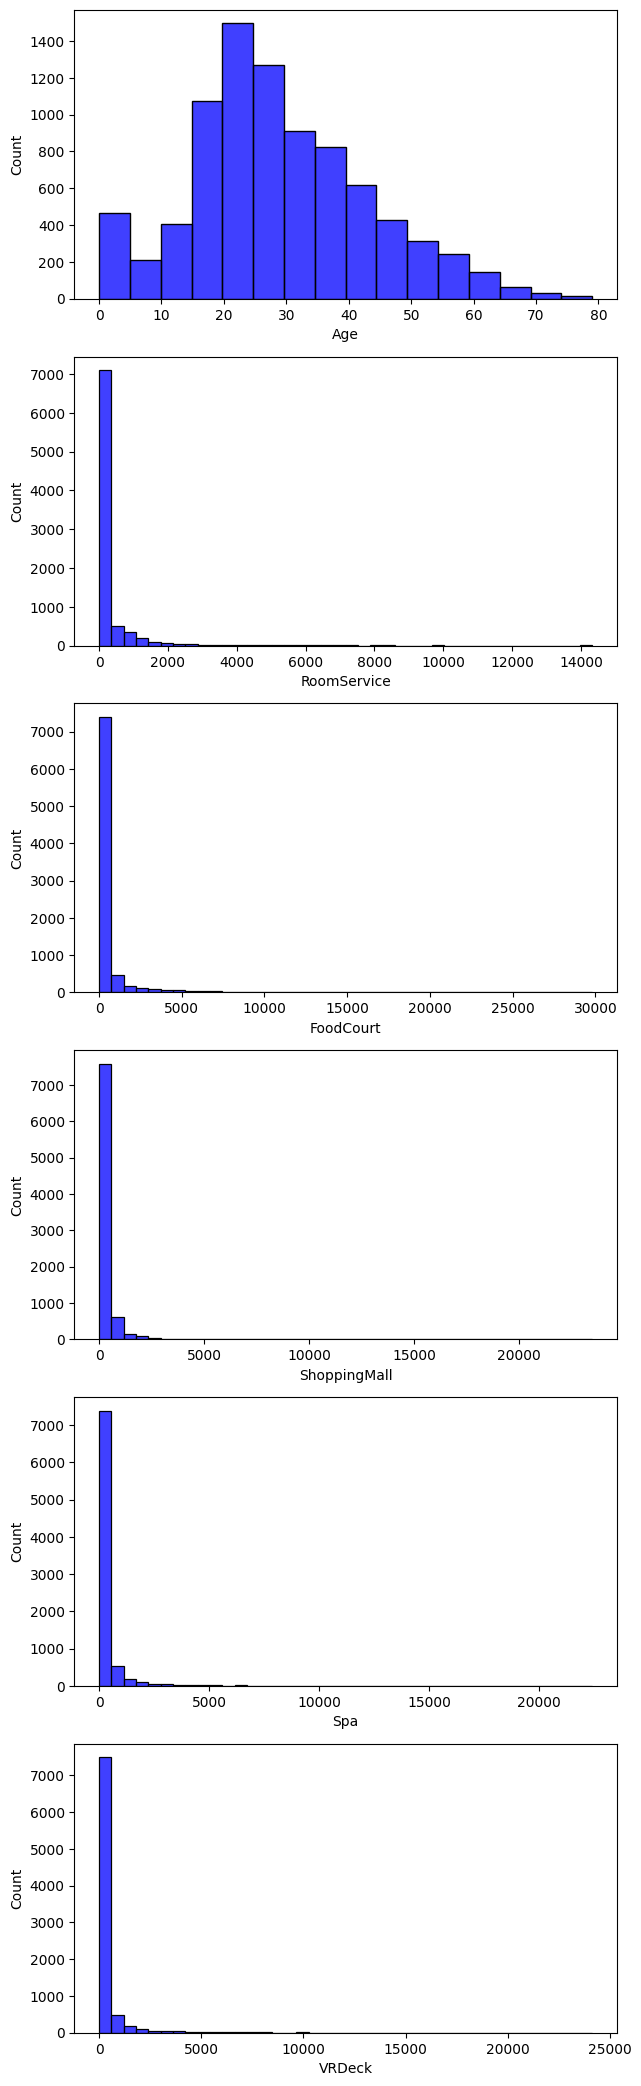

In [23]:
fig, ax = plt.subplots(6,1,  figsize=(7, 7))
plt.subplots_adjust(top = 3)

sns.histplot(train['Age'], color='b', bins=16, ax=ax[0]);
sns.histplot(train['RoomService'], color='b', bins=40, ax=ax[1]);
sns.histplot(train['FoodCourt'], color='b', bins=40, ax=ax[2]);
sns.histplot(train['ShoppingMall'], color='b', bins=40, ax=ax[3]);
sns.histplot(train['Spa'], color='b', bins=40, ax=ax[4]);
sns.histplot(train['VRDeck'], color='b', bins=40, ax=ax[5]);

In [24]:
train.select_dtypes(include=np.object_)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


### Categorical Columns Distribution

[Text(0, 0, '8291'), Text(0, 0, '199')]

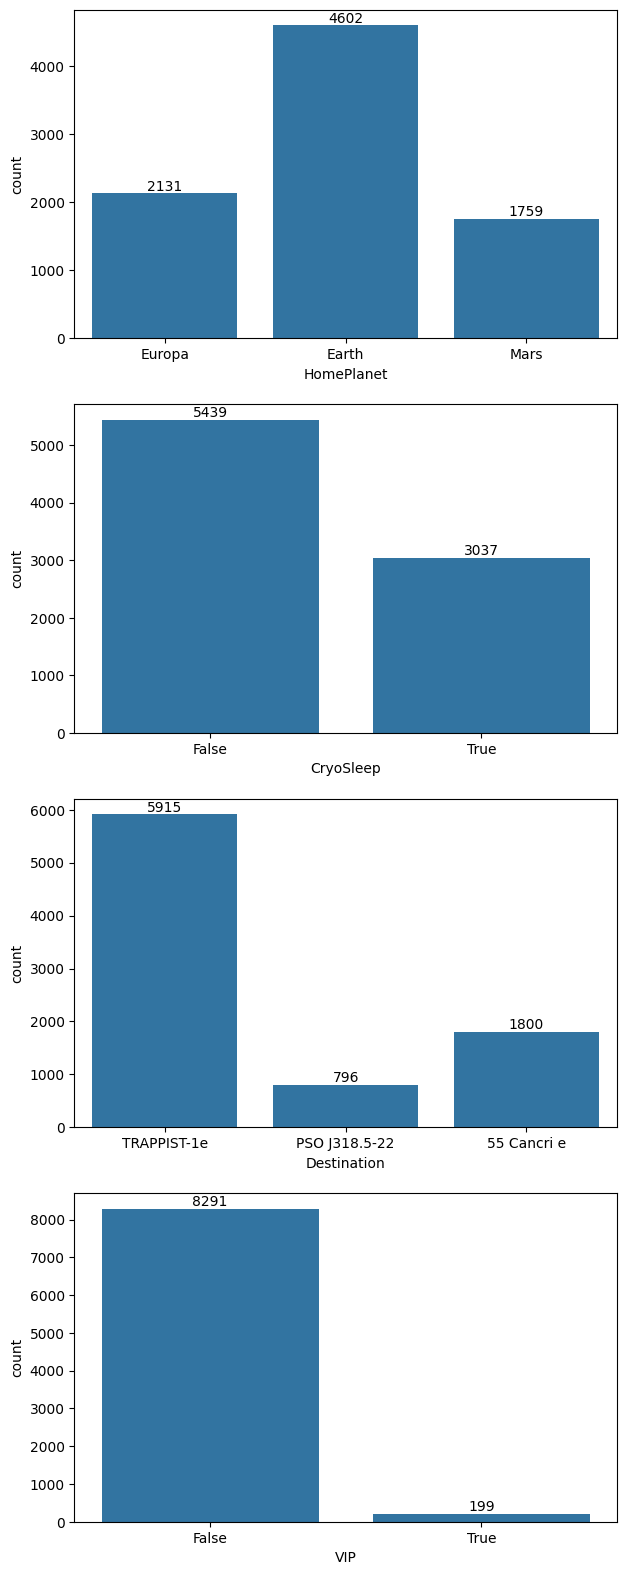

In [25]:
fig, ax = plt.subplots(4,1,  figsize=(7, 8))
plt.subplots_adjust(top = 2)

c1 = sns.countplot(data=train, x='HomePlanet', ax=ax[0])
c2 = sns.countplot(data=train, x='CryoSleep', ax=ax[1])
c3 = sns.countplot(data=train, x='Destination', ax=ax[2])
c4 = sns.countplot(data=train, x='VIP', ax=ax[3])
c1.bar_label(c1.containers[0])
c2.bar_label(c2.containers[0])
c3.bar_label(c3.containers[0])
c4.bar_label(c4.containers[0])

[Text(0, 0, '4315'), Text(0, 0, '4378')]

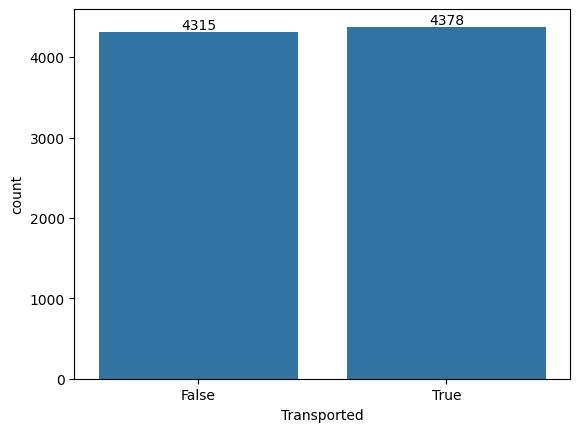

In [26]:
_ = sns.countplot(data=train, x='Transported')
_.bar_label(_.containers[0])

In [27]:
transported = train.loc[train.Transported == 1]
not_transported = train.loc[train.Transported == 0]

### Numerical Cols against Transported

#### Age x Transported

[Text(0.5, 1.0, 'Age distribution of non-transported people')]

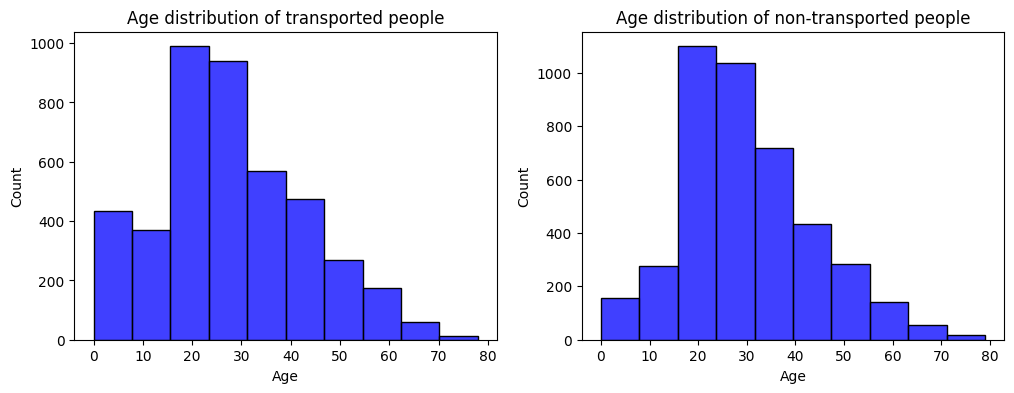

In [28]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(transported['Age'], color='b', bins=10, ax=ax[0]).set(title='Age distribution of transported people')
sns.histplot(not_transported['Age'], color='b', bins=10, ax=ax[1]).set(title='Age distribution of non-transported people')

#### FoodCourt x Transported

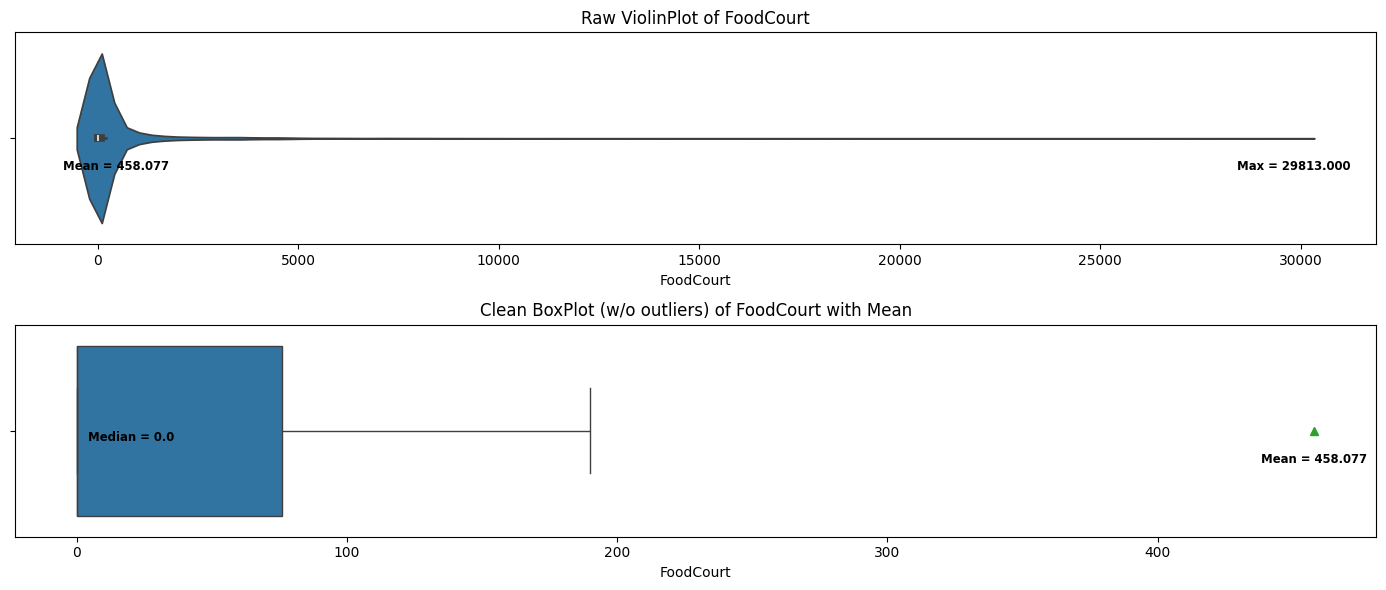

In [29]:
foodcourt_mean = train['FoodCourt'].mean()
foodcourt_md = train["FoodCourt"].median()
foodcourt_max = train["FoodCourt"].max()

fig, ax = plt.subplots(2,1,figsize=(14,6))
violin_fc = sns.violinplot(x=train['FoodCourt'], ax=ax[0])
violin_fc.set(title="Raw ViolinPlot of FoodCourt")
box_fc = sns.boxplot(x=train['FoodCourt'], ax=ax[1], showfliers=False, showmeans=True)
box_fc.set(title="Clean BoxPlot (w/o outliers) of FoodCourt with Mean")

violin_fc.text(foodcourt_mean, 0.15, 
            "Mean = {:.3f}".format(foodcourt_mean), 
            horizontalalignment='center', weight='semibold', size='small')
violin_fc.text(foodcourt_max, 0.15, 
            "Max = {:.3f}".format(foodcourt_max), 
            horizontalalignment='center', weight='semibold', size='small')
box_fc.text(foodcourt_mean, 0.15, 
            "Mean = {:.3f}".format(foodcourt_mean), 
            horizontalalignment='center', weight='semibold', size='small')
box_fc.text(foodcourt_md + 20, 0.05, 
            f"Median = {foodcourt_md}", 
            horizontalalignment='center', weight='semibold', size='small')

fig.tight_layout()

[Text(0.5, 1.0, 'FoodCourt distribution of non-transported people')]

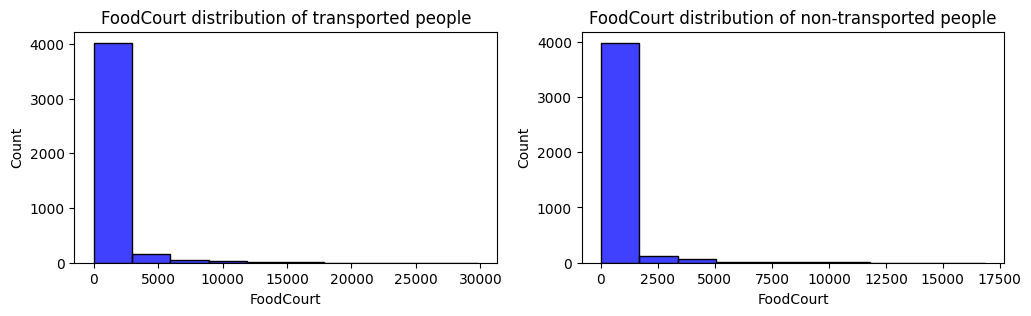

In [30]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.histplot(transported['FoodCourt'], color='b', bins=10, ax=ax[0]).set(title='FoodCourt distribution of transported people')
sns.histplot(not_transported['FoodCourt'], color='b', bins=10, ax=ax[1]).set(title='FoodCourt distribution of non-transported people')

#### ShoppingMall x Transported

[Text(0.5, 1.0, 'ShoppingMall distribution of non-transported people')]

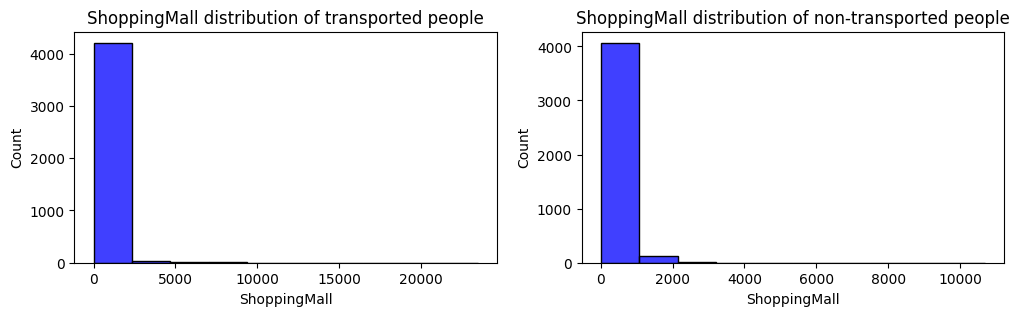

In [31]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.histplot(transported['ShoppingMall'], color='b', bins=10, ax=ax[0]).set(title='ShoppingMall distribution of transported people')
sns.histplot(not_transported['ShoppingMall'], color='b', bins=10, ax=ax[1]).set(title='ShoppingMall distribution of non-transported people')

#### RoomService x Transported

[Text(0.5, 1.0, 'RoomService distribution of non-transported people')]

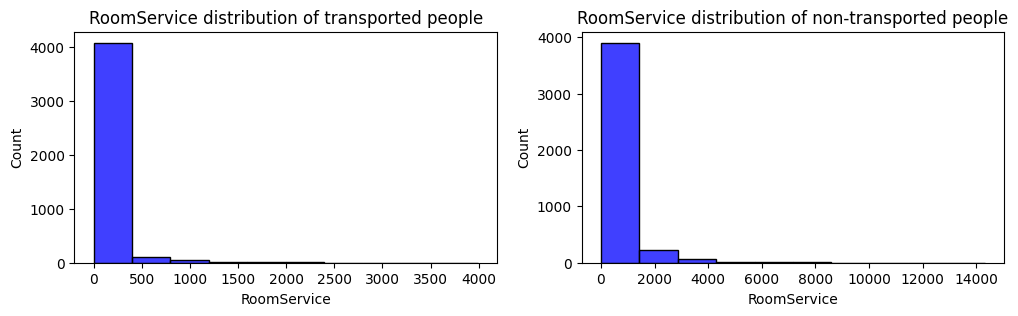

In [32]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.histplot(transported['RoomService'], color='b', bins=10, ax=ax[0]).set(title='RoomService distribution of transported people')
sns.histplot(not_transported['RoomService'], color='b', bins=10, ax=ax[1]).set(title='RoomService distribution of non-transported people')

### Categorical Cols against Transported

#### HomePlanet x Transported

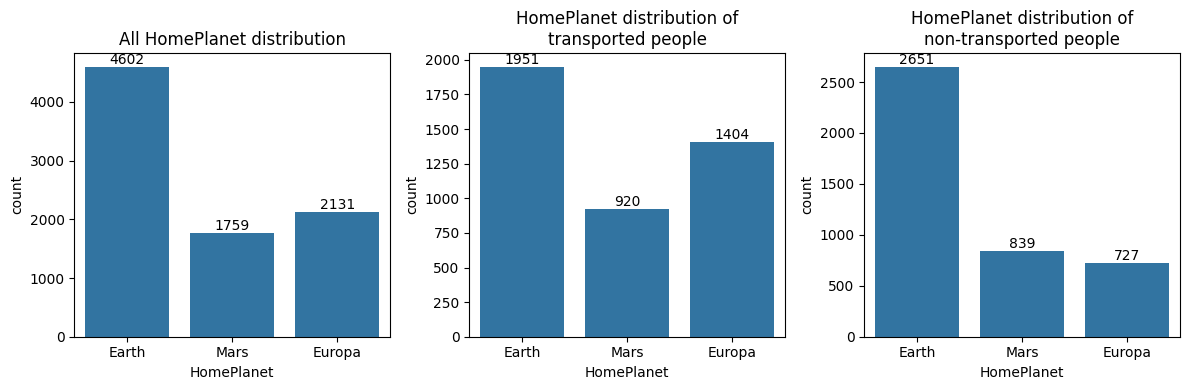

In [33]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
homeplanet_order = ['Earth', 'Mars', 'Europa']
train_hp = sns.countplot(data=train, x='HomePlanet', order=homeplanet_order, ax=ax[0])
train_hp.bar_label(train_hp.containers[0])
train_hp.set(title='All HomePlanet distribution')

transported_hp = sns.countplot(data=transported, x='HomePlanet', order=homeplanet_order, ax=ax[1])
transported_hp.bar_label(transported_hp.containers[0])
transported_hp.set(title='HomePlanet distribution of\ntransported people')

not_transported_hp = sns.countplot(data=not_transported, x='HomePlanet', order=homeplanet_order, ax=ax[2])
not_transported_hp.bar_label(not_transported_hp.containers[0])
not_transported_hp.set(title='HomePlanet distribution of\nnon-transported people')

fig.tight_layout()

#### CryoSleep x Transported

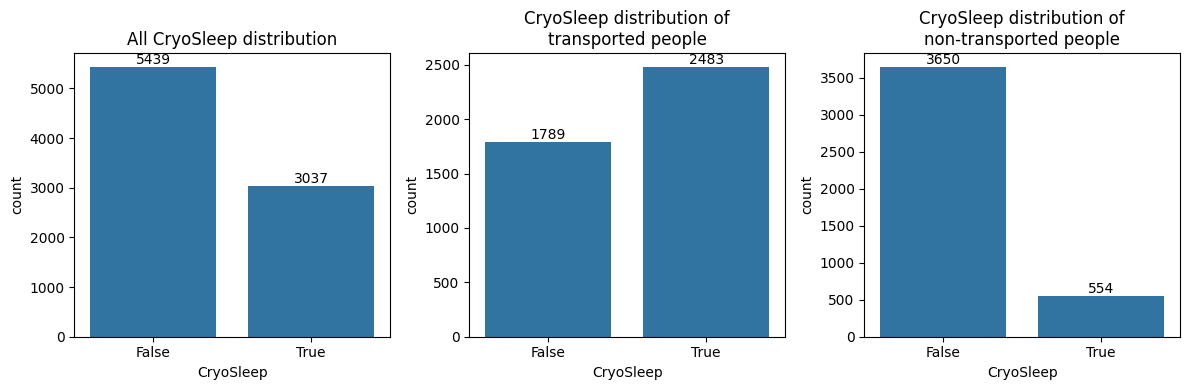

In [34]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
train_cs = sns.countplot(data=train, x='CryoSleep', ax=ax[0])
train_cs.bar_label(train_cs.containers[0])
train_cs.set(title='All CryoSleep distribution')

transported_cs = sns.countplot(data=transported, x='CryoSleep', ax=ax[1])
transported_cs.bar_label(transported_cs.containers[0])
transported_cs.set(title='CryoSleep distribution of\ntransported people')

not_transported_cs = sns.countplot(data=not_transported, x='CryoSleep', ax=ax[2])
not_transported_cs.bar_label(not_transported_cs.containers[0])
not_transported_cs.set(title='CryoSleep distribution of\nnon-transported people')

fig.tight_layout()

#### Destination x Transported

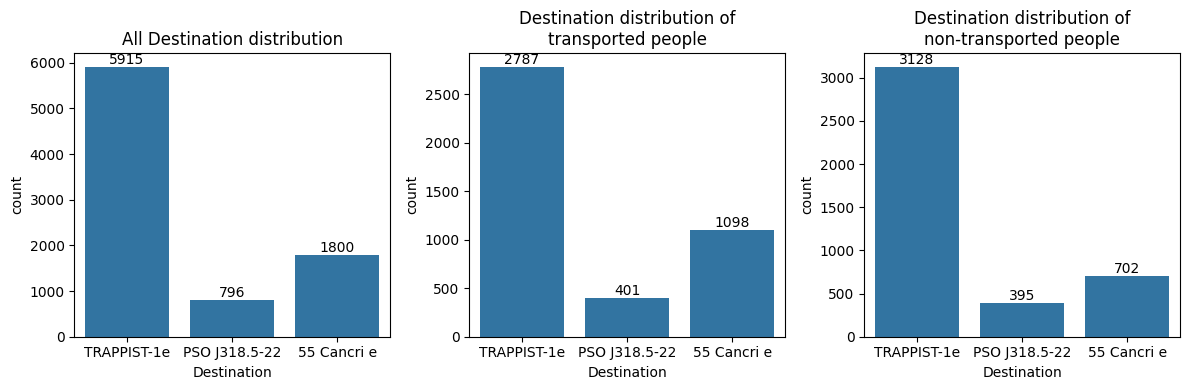

In [35]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
dest_order = ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
train_dest = sns.countplot(data=train, x='Destination', order=dest_order, ax=ax[0])
train_dest.bar_label(train_dest.containers[0])
train_dest.set(title='All Destination distribution')

transported_dest = sns.countplot(data=transported, x='Destination', order=dest_order, ax=ax[1])
transported_dest.bar_label(transported_dest.containers[0])
transported_dest.set(title='Destination distribution of\ntransported people')

not_transported_dest = sns.countplot(data=not_transported, x='Destination', order=dest_order, ax=ax[2])
not_transported_dest.bar_label(not_transported_dest.containers[0])
not_transported_dest.set(title='Destination distribution of\nnon-transported people')

fig.tight_layout()

#### VIP x Transported

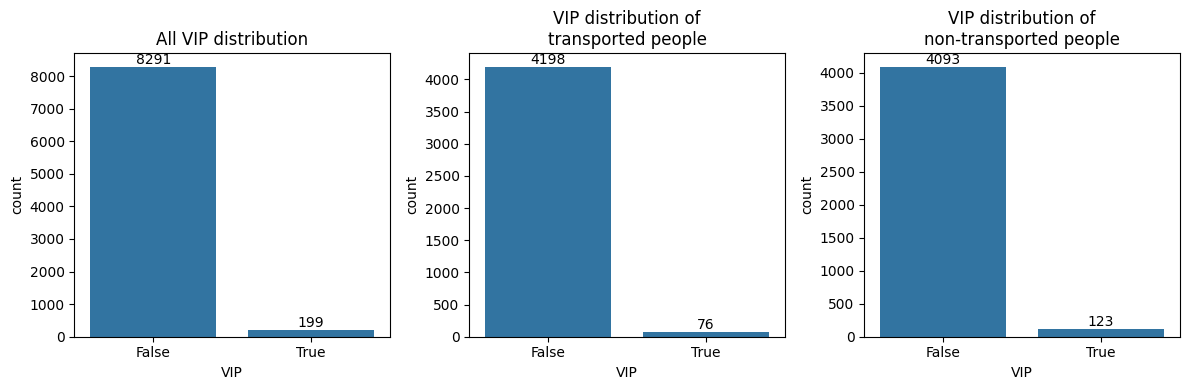

In [36]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
train_VIP = sns.countplot(data=train, x='VIP', ax=ax[0])
train_VIP.bar_label(train_VIP.containers[0])
train_VIP.set(title='All VIP distribution')

transported_VIP = sns.countplot(data=transported, x='VIP', ax=ax[1])
transported_VIP.bar_label(transported_VIP.containers[0])
transported_VIP.set(title='VIP distribution of\ntransported people')

not_transported_VIP = sns.countplot(data=not_transported, x='VIP', ax=ax[2])
not_transported_VIP.bar_label(not_transported_VIP.containers[0])
not_transported_VIP.set(title='VIP distribution of\nnon-transported people')

fig.tight_layout()

#### CabinDeck x Transported
CabinDeck will be an engineered feature based on Cabin

In [37]:
train['CabinDeck'] = train['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'Na')

In [38]:
transported['CabinDeck'] = train.loc[train['Transported']].get('CabinDeck')
not_transported['CabinDeck'] = train.loc[~train['Transported']].get('CabinDeck')

C:\Users\AlifHazairin\AppData\Local\Temp\ipykernel_10120\2002600551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transported['CabinDeck'] = train.loc[train['Transported']].get('CabinDeck')
C:\Users\AlifHazairin\AppData\Local\Temp\ipykernel_10120\2002600551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_transported['CabinDeck'] = train.loc[~train['Transported']].get('CabinDeck')


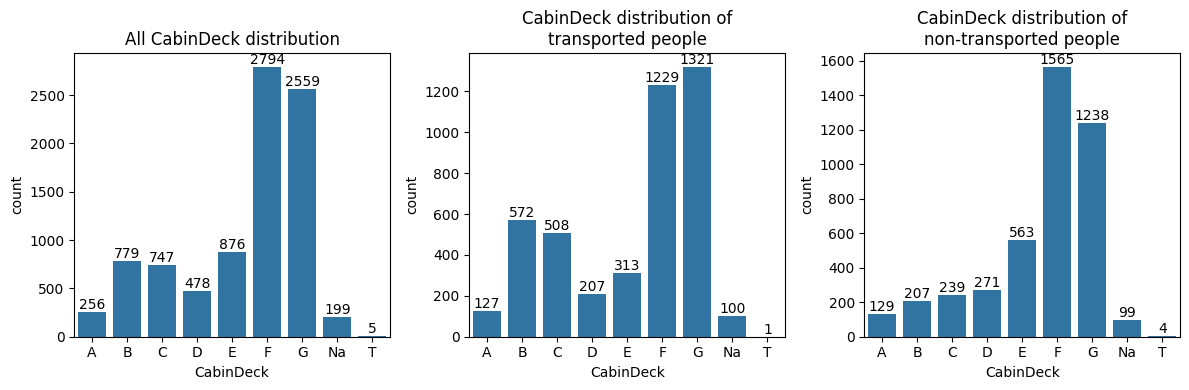

In [39]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
CabinDeck_order = sorted(transported.CabinDeck.unique())
train_ct = sns.countplot(data=train, x='CabinDeck', order=CabinDeck_order, ax=ax[0])
train_ct.bar_label(train_ct.containers[0])
train_ct.set(title='All CabinDeck distribution')

transported_ct = sns.countplot(data=transported, x='CabinDeck', order=CabinDeck_order, ax=ax[1])
transported_ct.bar_label(transported_ct.containers[0])
transported_ct.set(title='CabinDeck distribution of\ntransported people')

not_transported_ct = sns.countplot(data=not_transported, x='CabinDeck', order=CabinDeck_order, ax=ax[2])
not_transported_ct.bar_label(not_transported_ct.containers[0])
not_transported_ct.set(title='CabinDeck distribution of\nnon-transported people')

fig.tight_layout()

#### Cabin Side x Transported
Cabin side will be an engineered feature based on Cabin

In [40]:
train['CabinSide'] = train['Cabin'].apply(lambda x: x[-1] if isinstance(x, str) else 'Na')

In [41]:
transported['CabinSide'] = train.loc[train['Transported']].get('CabinSide')
not_transported['CabinSide'] = train.loc[~train['Transported']].get('CabinSide')

C:\Users\AlifHazairin\AppData\Local\Temp\ipykernel_10120\1844336171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transported['CabinSide'] = train.loc[train['Transported']].get('CabinSide')
C:\Users\AlifHazairin\AppData\Local\Temp\ipykernel_10120\1844336171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_transported['CabinSide'] = train.loc[~train['Transported']].get('CabinSide')


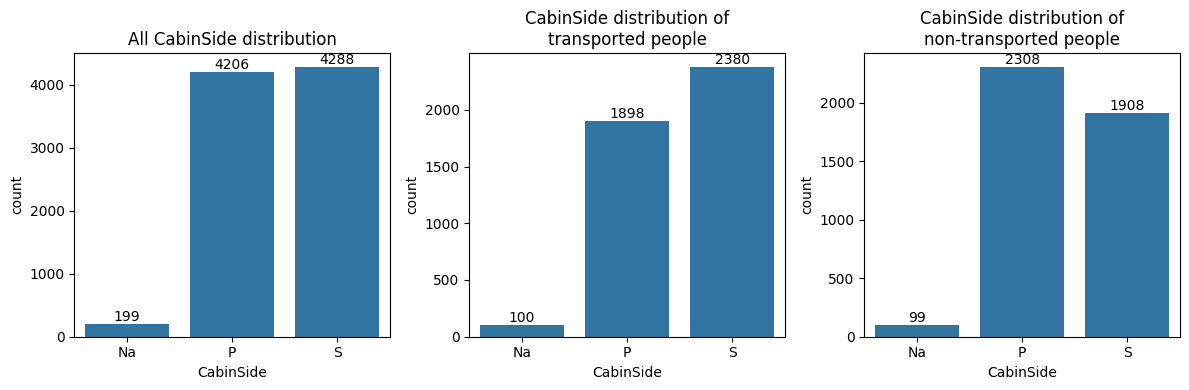

In [42]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
CabinSide_order = sorted(transported.CabinSide.unique())
train_cs = sns.countplot(data=train, x='CabinSide', order=CabinSide_order, ax=ax[0])
train_cs.bar_label(train_cs.containers[0])
train_cs.set(title='All CabinSide distribution')

transported_cs = sns.countplot(data=transported, x='CabinSide', order=CabinSide_order, ax=ax[1])
transported_cs.bar_label(transported_cs.containers[0])
transported_cs.set(title='CabinSide distribution of\ntransported people')

not_transported_cs = sns.countplot(data=not_transported, x='CabinSide', order=CabinSide_order, ax=ax[2])
not_transported_cs.bar_label(not_transported_cs.containers[0])
not_transported_cs.set(title='CabinSide distribution of\nnon-transported people')

fig.tight_layout()

## Data Preprocessing

Feature to use: Cabin Side, Cabin Deck, VIP, Destination, CryoSleep, HomePlanet, Age. </br>
**Note**: </br>
1st Attempt: Because we use mostly categorical data, we'll try to include the missing values in categorical columns and together with non-NaN value we use get_dummies to get one-hot encoding for them, producing a set of entries with 0,0,0 for each NaN value in the original set. But we delete the NaN Age, VIP, and CryoSleep.

In [43]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


Feature to use: Cabin Side, Cabin Deck, VIP, Destination, CryoSleep, HomePlanet, Age

In [44]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Create Cabin Deck and Cabin Side Column for Test

In [45]:
test['CabinDeck'] = test['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'Na')
test['CabinSide'] = test['Cabin'].apply(lambda x: x[-1] if isinstance(x, str) else 'Na')

In [52]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Na,Na
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,P


### Make Train & Test Have the Same Columns

In [91]:
train2 = pd.get_dummies(train[['HomePlanet', 'Age', 'CabinDeck', 'CabinSide']], dtype=int)
train2['VIP'] = train['VIP']
train2['CryoSleep'] = train['CryoSleep']
train2['Transported'] = train['Transported']

train2

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_Na,CabinDeck_T,CabinSide_Na,CabinSide_P,CabinSide_S,VIP,CryoSleep,Transported
0,39.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,False,False,False
1,24.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,True
2,58.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,True,False,False
3,33.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,False,False,False
4,16.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,True,False,False
8689,18.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,True,False
8690,26.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,False,True
8691,32.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,False,False,False


In [92]:
test2 = pd.get_dummies(test[['HomePlanet', 'Age', 'CabinDeck', 'CabinSide']], dtype=int)
test2['VIP'] = test['VIP']
test2['CryoSleep'] = test['CryoSleep']

test2

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_Na,CabinDeck_T,CabinSide_Na,CabinSide_P,CabinSide_S,VIP,CryoSleep
0,27.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,True
1,19.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False
2,31.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,False,True
3,38.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,False,False
4,20.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,True
4273,42.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,False,False
4274,NaN,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,False,True
4275,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,False,False


### Handle Missing Values

#### Train set

In [93]:
# Drop missing values in Age, VIP and CryoSleep
train2.dropna(subset=['Age', 'VIP', 'CryoSleep'], inplace=True, ignore_index=True)

In [94]:
train2

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_Na,CabinDeck_T,CabinSide_Na,CabinSide_P,CabinSide_S,VIP,CryoSleep,Transported
0,39.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,False,False,False
1,24.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,True
2,58.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,True,False,False
3,33.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,False,False,False
4,16.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,41.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,True,False,False
8104,18.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,True,False
8105,26.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,False,True
8106,32.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,False,False,False


In [95]:
train2.isna().sum()

Age                  0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
CabinDeck_A          0
CabinDeck_B          0
CabinDeck_C          0
CabinDeck_D          0
CabinDeck_E          0
CabinDeck_F          0
CabinDeck_G          0
CabinDeck_Na         0
CabinDeck_T          0
CabinSide_Na         0
CabinSide_P          0
CabinSide_S          0
VIP                  0
CryoSleep            0
Transported          0
dtype: int64

#### Test Set

We cannot delete the missing values in test set so we're going to impute it. </br>
For `Age` we will replace the NaN with median.
For `VIP` and `CryoSleep` we replace it with False.

In [96]:
test2.Age = test2.Age.fillna(test2.Age.median())

In [97]:
test2.VIP = test2.VIP.fillna(False)
test2.CryoSleep = test2.CryoSleep.fillna(False)

C:\Users\AlifHazairin\AppData\Local\Temp\ipykernel_10120\1344101644.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test2.VIP = test2.VIP.fillna(False)
C:\Users\AlifHazairin\AppData\Local\Temp\ipykernel_10120\1344101644.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test2.CryoSleep = test2.CryoSleep.fillna(False)


In [98]:
test2.isna().sum()

Age                  0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
CabinDeck_A          0
CabinDeck_B          0
CabinDeck_C          0
CabinDeck_D          0
CabinDeck_E          0
CabinDeck_F          0
CabinDeck_G          0
CabinDeck_Na         0
CabinDeck_T          0
CabinSide_Na         0
CabinSide_P          0
CabinSide_S          0
VIP                  0
CryoSleep            0
dtype: int64

In [99]:
test2

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_Na,CabinDeck_T,CabinSide_Na,CabinSide_P,CabinSide_S,VIP,CryoSleep
0,27.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,True
1,19.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False
2,31.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,False,True
3,38.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,False,False
4,20.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,True
4273,42.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,False,False
4274,26.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,False,True
4275,26.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,False,False


### Scale Data

Only for `Age` column.

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train2.Age = scaler.fit_transform(train2[['Age']])
test2.Age = scaler.transform(test2[['Age']])

In [101]:
train2.head()

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_Na,CabinDeck_T,CabinSide_Na,CabinSide_P,CabinSide_S,VIP,CryoSleep,Transported
0,0.700069,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,False,False,False
1,-0.336837,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,True
2,2.013483,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,True,False,False
3,0.285307,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,False,False,False
4,-0.889853,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,True


In [102]:
test2.head()

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_Na,CabinDeck_T,CabinSide_Na,CabinSide_P,CabinSide_S,VIP,CryoSleep
0,-0.129456,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,True
1,-0.682472,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False
2,0.147053,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,False,True
3,0.630942,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,False,False
4,-0.613345,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False


In [103]:
train2.VIP = train2.VIP.apply(int)
test2.VIP = test2.VIP.apply(int)

train2.CryoSleep = train2.CryoSleep.apply(int)
test2.CryoSleep = test2.CryoSleep.apply(int)

In [112]:
X_train = train2.drop(columns='Transported')
y_train = train2['Transported'].to_numpy().reshape(-1)
X_test = test2.copy()

## Model Building

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [118]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.68803946 0.51048089 0.6892725  0.71437384 0.72979642]
CV Mean: 0.6663926227207482


In [136]:
lr = LogisticRegression(max_iter = 2000, random_state=42)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.72626387 0.74167694 0.71208385 0.73966687 0.73411474]
CV Mean: 0.7307612554397394


In [121]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.702836   0.70098644 0.69235512 0.71314004 0.71869217]
CV Mean: 0.7056019521827798


In [122]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.67940814 0.69420469 0.69543773 0.70388649 0.70326959]
CV Mean: 0.695241326273304


In [124]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.69790382 0.70406905 0.69913687 0.71560765 0.71437384]
CV Mean: 0.7062182467932067


In [135]:
svc = SVC(probability = True, random_state=42)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.73119605 0.74845869 0.73612824 0.75755706 0.745219  ]
CV Mean: 0.7437118096256667


In [130]:
voting_clf = VotingClassifier(
    estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft'
)
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.72503083 0.71146732 0.72133169 0.74645281 0.74213448]
CV Mean: 0.7292834262998514


In [137]:
svc.fit(X_train, y_train)
y_hat_base_svc = svc.predict(X_test)
basic_submission = {'PassengerId': test.PassengerId, 'Transported': y_hat_base_svc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

## End